# Model Evaluation through Confusion Matrices
This notebook looks at the confusion matrices of the predictions from the base model and the VGG-16 model. I also implement a 'One-Off' accuracy score to evaluate a model's predictions given that age groups are not completely independent of each other.

In [94]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
base_results = pd.read_csv('../results/basic_cnn_model.csv')
vgg_results = pd.read_csv('../results/vgg16_15.csv', )

In [3]:
base_results.head()

,Filename,Predictions
0,0-10,21-30
1,0-10,21-30
2,0-10,21-30
3,0-10,21-30
4,0-10,21-30


In [6]:
base_results.shape

(8530, 2)

In [4]:
vgg_results.head()

,Filename,Predictions
0,0-10,0-10
1,0-10,0-10
2,0-10,0-10
3,0-10,11-20
4,0-10,0-10


In [7]:
vgg_results.shape

(8530, 2)

In [59]:
# Writing a function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    # normalizing confusion matrix if normalize=True
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [18]:
# Retrieving the y_true and y_pred lists from the dataframes
y_test = base_results['Filename'].tolist()
y_pred_base = base_results['Predictions'].tolist()
y_pred_vgg = vgg_results['Predictions'].tolist()

In [24]:
# Retreiving class names from dataframes
class_names = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70']

In [25]:
# Compute confusion matrix for base model
base_cnf_matrix = confusion_matrix(y_test, y_pred_base)
np.set_printoptions(precision=2)

# Compute confusion matrix for vgg model
vgg_cnf_matrix = confusion_matrix(y_test, y_pred_vgg)
np.set_printoptions(precision=2)

### Confusion matrix for base model

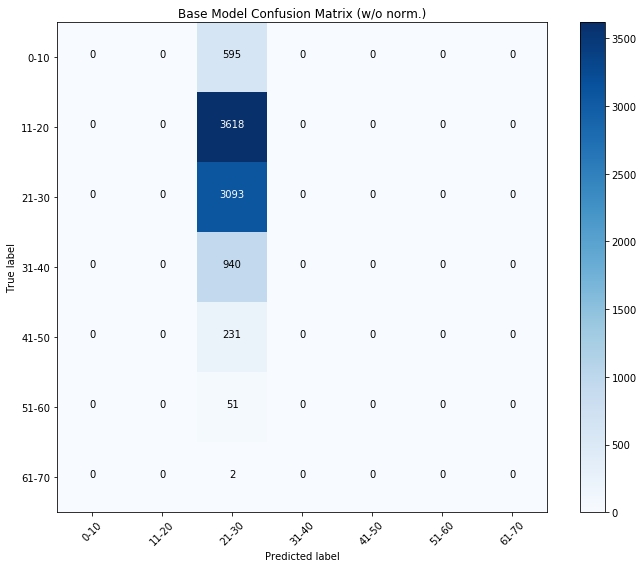

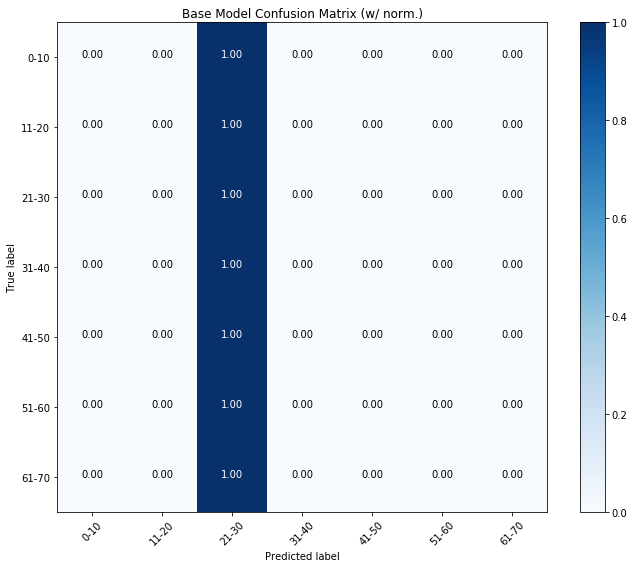

In [68]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(base_cnf_matrix, classes=class_names,
                      title='Base Model Confusion Matrix (w/o norm.)');
plt.savefig('../images/base_confusion_count.png', bbox_inches='tight')
# Plot normalized confusion matrix
plot_confusion_matrix(base_cnf_matrix, classes=class_names, normalize=True,
                      title='Base Model Confusion Matrix (w/ norm.)');
plt.savefig('../images/base_confusion_norm.png', bbox_inches='tight')

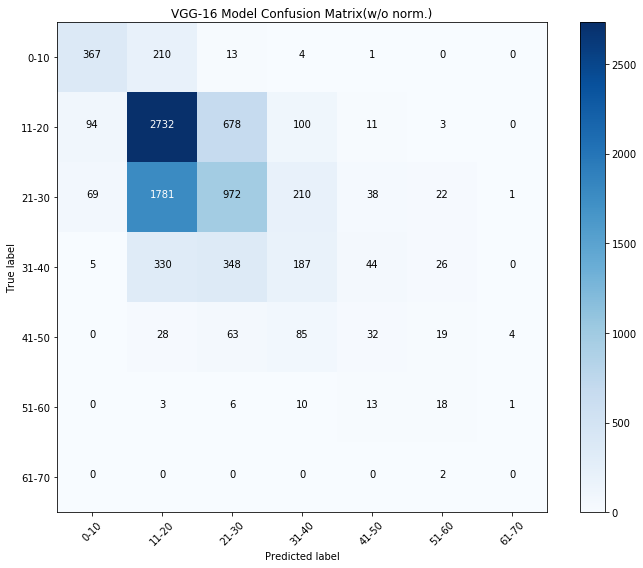

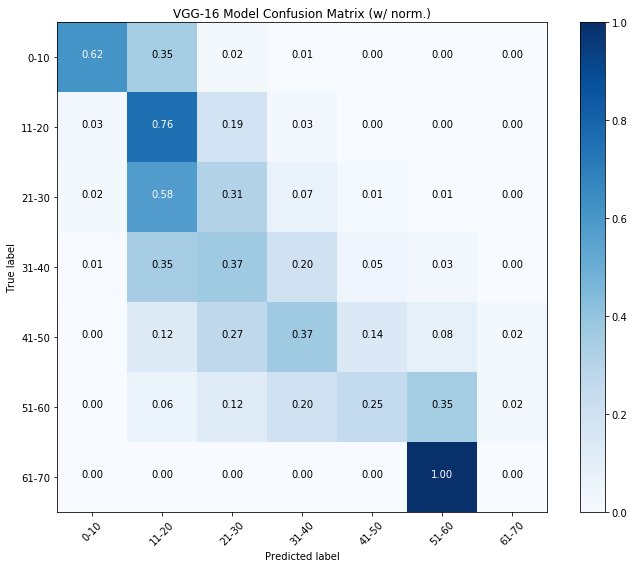

In [66]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(vgg_cnf_matrix, classes=class_names,
                      title='VGG-16 Model Confusion Matrix(w/o norm.)');
plt.savefig('../images/vgg_confusion_count.png', bbox_inches='tight')
# Plot normalized confusion matrix

plot_confusion_matrix(vgg_cnf_matrix, classes=class_names, normalize=True,
                      title='VGG-16 Model Confusion Matrix (w/ norm.)');
plt.savefig('../images/vgg_confusion_norm.png', bbox_inches='tight')

### Calculating One-Off Accuracy
Taking a look at the visualized confusion matrix, we can see that the VGG-16 model is getting close to classifying some age groups correctly but might be "one-off", meaning that the true class might be '21-30', but the model might be predicting '31-40'. We can say that predicting 'one-off' is a better prediction than being more than 'one-off', since there is a close relationship between adjacent classes (age groups). With that in mind, I created a function that would calculate 'one-off' accuracy by giving one point for the correct class, half a point for being 'one-off', and 0 points for being more than 'one-off'.

In [71]:
# The base accuracy score is 51%
accuracy_score(y_test, y_pred_vgg)

0.5050410316529894

In [85]:
def one_off(y_test, y_pred):
    map_class = {
        '0-10': 0,
        '11-20': 1,
        '21-30': 2,
        '31-40': 3,
        '41-50': 4,
        '51-60': 5,
        '61-70': 6
    }
    
    acc_count = 0
    
    for i in range(len(y_test)):
        if map_class[y_pred[i]] == map_class[y_test[i]]:
            acc_count += 1
        elif map_class[y_pred[i]] == map_class[y_test[i]] - 1 or map_class[y_pred[i]] == map_class[y_test[i]] + 1:
            acc_count += 0.5
    
    return acc_count/len(y_test)

In [86]:
one_off(y_test, y_pred_vgg)

0.7093200468933177

The 'One-Off' accuracy score yielded 71% for the VGG-16 model! This means that the model is predicting the class or one class away from the true class 71% of the time! This is a better metric than accuracy to show how the model is learning.

In [87]:
one_off(y_test, y_pred_base)

0.6297772567409144

The base model scored a 'One-Off' accuracy of 63%. This is because of class imbalance, where most of the observations are from the `11-20`, `21-30`, and `31-40` classes. With that being said, having more balanced classes would bring this number lower, as well as showing more distinction between the learned model and the base model.